In [3]:
# !pip install geopandas

# Import packages

In [62]:

import geopandas as gpd
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines


# Import data

In [85]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

shapefile = gpd.read_file(parent_dir + '/Data Input/DuBoisChallenge - Georgia Counties w 1870 & 1880 data.shp')


In [86]:
shapefile.head()

,DECADE,NHGISNAM,NHGISST,NHGISCTY,ICPSRST,ICPSRCTY,ICPSRNAM,STATENAM,ICPSRSTI,ICPSRCTYI,ICPSRFIP,GISJOIN,GISJOIN2,data1870 (,data1880_P,geometry
0,1880,Appling,130,0010,44,10,APPLING,Georgia,44,10,13001.0,G1300010,1300010,> 1000,1000 - 2500,"POLYGON ((1310135.815 -537927.898, 1310122.449..."
1,1880,Baker,130,0070,44,70,BAKER,Georgia,44,70,13007.0,G1300070,1300070,2500 - 5000,5000 - 10000,"POLYGON ((1090472.791 -651587.102, 1090472.696..."
2,1880,Baldwin,130,0090,44,90,BALDWIN,Georgia,44,90,13009.0,G1300090,1300090,5000 - 10000,5000 - 10000,"POLYGON ((1197510.422 -412783.587, 1197504.152..."
3,1880,Banks,130,0110,44,110,BANKS,Georgia,44,110,13011.0,G1300110,1300110,> 1000,1000 - 2500,"POLYGON ((1139450.939 -262734.181, 1139506.348..."
4,1880,Bartow,130,0150,44,150,BARTOW,Georgia,44,150,13015.0,G1300150,1300150,2500 - 5000,5000 - 10000,"POLYGON ((1036374.373 -321181.083, 1036153.611..."


In [90]:
shapefile["data1870 ("].value_counts()

2500 - 5000      37
5000 - 10000     33
> 1000           32
1000 - 2500      22
10000 - 15000     5
None              5
15000 - 20000     2
20000 - 30000     1
Name: data1870 (, dtype: int64

# Clean Data

In [91]:
#Relable NAs with 'None'
shapefile["data1870 ("] = shapefile["data1870 ("].fillna('None')
shapefile["data1880_P"] = shapefile["data1880_P"].fillna('None')

#Change labels to match labels in the image
changes = {
    '20000 - 30000': 'BETWEEN 20,000 AND 30,000',
    '15000 - 20000': '15,000 TO 20,000',
    '10000 - 15000': '10,000 TO 15,000',
    '5000 - 10000': '5,000 TO 10,000',
    '2500 - 5000': '2,500 TO 5,000',
    '1000 - 2500': '1,000 TO 2,500',
    '> 1000': 'UNDER 1,000'
}

shapefile["data1870 ("] = shapefile["data1870 ("].replace(changes)
shapefile["data1880_P"] = shapefile["data1880_P"].replace(changes)

# Plot data

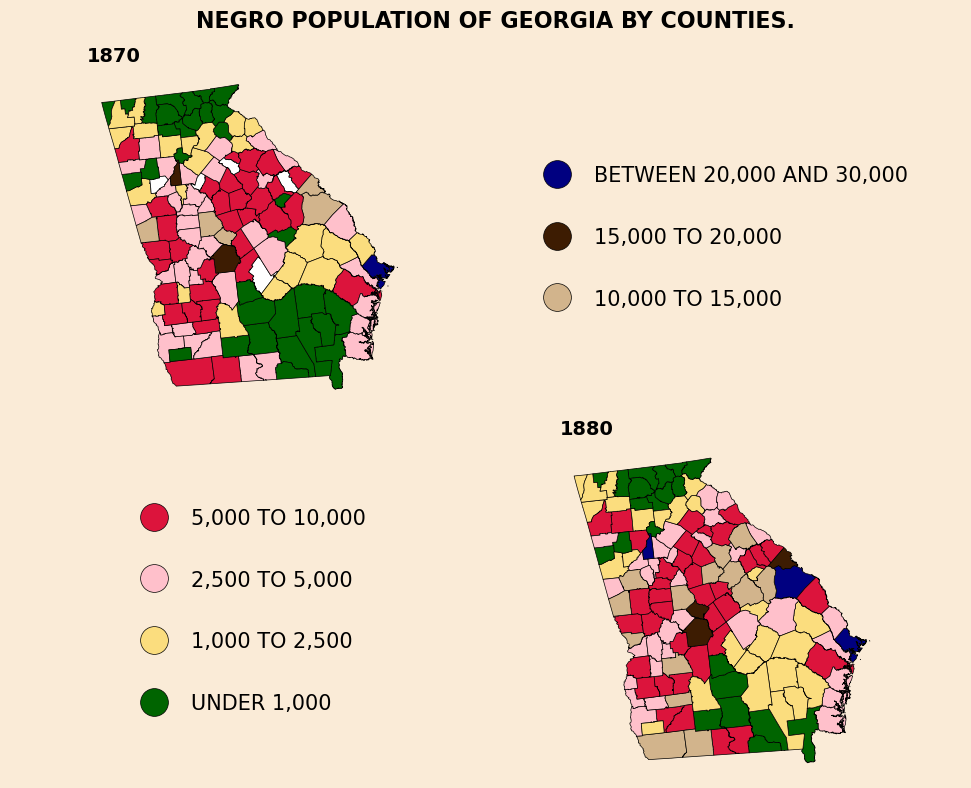

In [92]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

duboisPalette = {'BETWEEN 20,000 AND 30,000': '#000080',
                 '15,000 TO 20,000': '#3D1C02',
                 '10,000 TO 15,000': '#D2B48C',
                 '5,000 TO 10,000': '#DC143C',
                 '2,500 TO 5,000': '#FFC0CB',
                 '1,000 TO 2,500': '#FBDD7E',
                 'UNDER 1,000': '#006400',
                 'None': '#FFFFFF'
                 }

# Assign a color column based on the categories for each dataset
shapefile['color1870'] = shapefile['data1870 ('].map(duboisPalette)
shapefile['color1880'] = shapefile['data1880_P'].map(duboisPalette)

# Then plot using these color columns
shapefile.plot(ax=ax1, color=shapefile['color1870'], legend=True, edgecolor = 'black', linewidth=0.5)
shapefile.plot(ax=ax4, color=shapefile['color1880'], legend=True, edgecolor = 'black', linewidth=0.5)

fig.suptitle('NEGRO POPULATION OF GEORGIA BY COUNTIES.', fontsize=16, fontweight='bold')

ax1.set_title('1870', fontsize=14, fontweight='bold', loc='left')
ax4.set_title('1880', fontsize=14, fontweight='bold', loc='left')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

#Create custom legend
handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=20, label=label, markeredgecolor='black', markeredgewidth=0.5) for label, color in duboisPalette.items()]
legend_top_right = handles[0:3]
ax2.legend(handles=legend_top_right, loc='center', frameon=False, fontsize=15, labelspacing=2)

legend_bottom_left = handles[3:7]
ax3.legend(handles=legend_bottom_left, loc='center', frameon=False, fontsize=15, labelspacing=2)

plt.tight_layout()

fig.patch.set_facecolor('antiquewhite')

plt.show()

In [36]:
shapefile['color1870'].unique()

array(['#228B22', '#FFC0CB', '#FF0000', '#A52A2A', '#FFFF00', '#000080',
       nan, '#8B4513'], dtype=object)